# 7.2 Arima 실습

In [4]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
#SBUX data를 바탕으로, 책에 있는 코드를 실습한다.
# 책 데이터가 없어요.

data = pd.read_csv('C:/Users/USER/Desktop/dataset/SBUX.csv')

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-11,86.260002,86.870003,85.849998,86.589996,84.145752,4921900
1,2019-12-12,88.000000,88.889999,87.540001,88.209999,85.720032,10282100
2,2019-12-13,88.019997,88.790001,87.580002,88.669998,86.167046,6714100
3,2019-12-16,89.139999,89.300003,88.430000,88.779999,86.273941,6705600
4,2019-12-17,88.870003,88.970001,87.470001,88.129997,85.642288,7296900
...,...,...,...,...,...,...,...
248,2020-12-04,101.349998,102.940002,101.070000,102.279999,101.442787,6952700
249,2020-12-07,102.010002,102.220001,100.690002,101.410004,100.579918,4514800
250,2020-12-08,100.370003,101.570000,100.010002,101.209999,100.381554,3911300
251,2020-12-09,101.940002,102.209999,100.099998,100.400002,99.578186,6629900


In [11]:
series_data = data[['Date', 'Open']]

In [13]:
# datetime으로 변경 필요.
series_data.Date = pd.to_datetime(series_data.Date)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [29]:
#series_data = series_data.set_index('Date')
model = ARIMA(series_data, order = (5, 1, 1))

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                  252
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -517.088
Method:                       css-mle   S.D. of innovations              1.883
Date:                Thu, 07 Apr 2022   AIC                           1050.176
Time:                        00:39:01   BIC                           1078.412
Sample:                             1   HQIC                          1061.537
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0685      0.115      0.595      0.552      -0.157       0.294
ar.L1.D.Open    -0.7779      0.230     -3.387      0.001      -1.228      -0.328
ar.L2.D.Open    -0.0924      0.083     -1.11

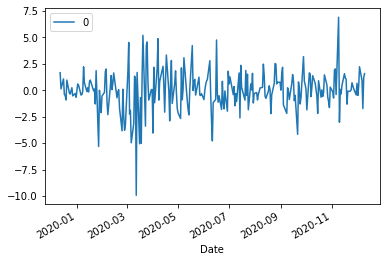

In [30]:
model_fit = model.fit(disp = 0)
print(model_fit.summary()) # 모델에 대한 정보 표시
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

다음과 같이 모델에 대한 정보와, 오차항을 띄울 수 있다.